# Proyek Analisis Data: Bike Sharing Dataset
- Nama        : Rhisa Adika Putri
- Email       : rhisaadikaputri2@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana permintaan persewaan sepeda saat hari kerja atau hari libur?
- Bagaimana pengaruh cuaca terhadap permintaan persewaan sepeda?
- Bagaimana peningkatan persewaan sepeda setiap bulannya berdasarkan tahun?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menganalisis tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menganalisis tabel `hour_df`

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

##### Mengubah nama kolom

In [10]:
day_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'yr':'year',
                        'mnth':'month',
                        'hum':'humidity',
                        'cnt':'total_count'},inplace=True)

`Hal ini dilakukan agar informasi nama kolom dapat di pahami dengan lebih mudah`

##### Memperbaiki tipe data

In [11]:
datetime_columns = ["datetime"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [12]:
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rec_id       731 non-null    int64         
 1   datetime     731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total_count  731 non-null    int64         
dtypes: categ

In [14]:
day_df.describe()

,rec_id,datetime,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Membersihkan tabel `hour_df`

##### Mengubah nama kolom

In [15]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'hum':'humidity',
                        'cnt':'total_count'},inplace=True)

`Hal ini dilakukan agar informasi nama kolom dapat di pahami dengan lebih mudah`

##### Memperbaiki tipe data

In [16]:
datetime_columns = ["datetime"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [17]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rec_id       17379 non-null  int64         
 1   datetime     17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  category      
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

In [19]:
hour_df.describe()

,rec_id,datetime,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

In [20]:
hour_df.head(5)

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
# mengubah isi kolom category agar jelas
hour_df['season'] = hour_df['season'].replace({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['year'] = hour_df['year'].replace({0: '2011', 1: '2012'})
hour_df['month'] = hour_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'March', 4: 'Apr', 5: 'May', 6: 'Jun', 
                                             7: 'Jul', 8: 'Ags', 9: 'Sept', 10: 'Okt', 11: 'Nov', 12: 'Des'})
hour_df['workingday'] = hour_df['workingday'].replace({0: 'Weekend/Holiday', 1: 'Working Day'})
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
                                                       2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
                                                       3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 
                                                       4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [22]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Springer,2011,Jan,0,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


### Explore `day_df`

In [23]:
day_df.sample(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
631,632,2012-09-23,4,1,9,0,0,0,1,0.529167,0.518933,0.467083,0.223258,2454,5453,7907
678,679,2012-11-09,4,1,11,0,5,1,1,0.361667,0.355413,0.540833,0.214558,709,5283,5992
376,377,2012-01-12,1,1,1,0,4,1,2,0.382500,0.381938,0.802917,0.180967,269,3828,4097
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
621,622,2012-09-13,3,1,9,0,4,1,1,0.612500,0.579558,0.637083,0.082721,1054,6750,7804


In [24]:
day_df.rec_id.is_unique

True

In [25]:
day_df.rec_id.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: rec_id, Length: 731, dtype: int64>

In [26]:
day_df.groupby(by="month").rec_id.nunique()

month
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: rec_id, dtype: int64

In [27]:
year_distribution = day_df.groupby(by=["year", "month"]).agg({
    "rec_id": "count",
    "total_count": "sum"
})
year_distribution

rec_id  total_count
year month                     
0    1          31        38189
     2          28        48215
     3          31        64045
     4          30        94870
     5          31       135821
     6          30       143512
     7          31       141341
     8          31       136691
     9          30       127418
     10         31       123511
     11         30       102167
     12         31        87323
1    1          31        96744
     2          29       103137
     3          31       164875
     4          30       174224
     5          31       195865
     6          30       202830
     7          31       203607
     8          31       214503
     9          30       218573
     10         31       198841
     11         30       152664
     12         31       123713

In [28]:
day_df.groupby(by=["year", "season"]).rec_id.nunique()

year  season
0     1         90
      2         92
      3         94
      4         89
1     1         91
      2         92
      3         94
      4         89
Name: rec_id, dtype: int64

In [29]:
day_df.groupby(by=["holiday", "weekday"]).total_count.nunique()

holiday  weekday
0        0          104
         1           90
         2          103
         3          102
         4          101
         5          102
         6          102
1        0            0
         1           14
         2            1
         3            1
         4            2
         5            2
         6            0
Name: total_count, dtype: int64

`Dapat  dilihat bahwa peminat persewaan sepeda paling banyak ketika bukan hari libur (0)`

In [30]:
weather_distribution = day_df.groupby(by=["year", "weathersit"]).agg({
    "temp": "sum",
    "atemp": "sum",
    "humidity": "sum",
    "total_count": "sum"
})
weather_distribution

temp       atemp    humidity  total_count
year weathersit                                                 
0    1           112.895799  108.229348  130.629698       835067
     2            58.125497   55.843556   91.488704       382924
     3             6.611410    6.321995   12.819238        25112
1    1           123.947897  117.990679  131.240505      1422885
     2            58.054844   56.014839   87.805331       613934
     3             2.490833    2.352349    5.007084        12757

### Explore `hour_df`

In [31]:
hour_df.sample(5)

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
7722,7723,2011-11-23,Winter,2011,Nov,9,0,3,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.52,0.5000,0.94,0.1940,3,164,167
4652,4653,2011-07-17,Fall,2011,Jul,18,0,0,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.80,0.7273,0.46,0.2985,147,243,390
16702,16703,2012-12-03,Winter,2012,Des,17,0,1,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.52,0.5000,0.63,0.1045,43,665,708
2630,2631,2011-04-24,Summer,2011,Apr,12,0,0,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.68,0.6364,0.65,0.2537,168,220,388
12162,12163,2012-05-26,Summer,2012,May,23,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.70,0.6667,0.74,0.2537,36,114,150


In [32]:
hour_df.rec_id.is_unique

True

In [33]:
month_distribution = hour_df.groupby(by="month")['total_count'].sum().reset_index()
month_distribution

,month,total_count
0,Jan,134933
1,Feb,151352
2,March,228920
3,Apr,269094
4,May,331686
5,Jun,346342
6,Jul,344948
7,Ags,351194
8,Sept,345991
9,Okt,322352


In [34]:
year_distribution = hour_df.groupby(by=["year", "month"]).agg({
    "total_count": "sum"
})
year_distribution

total_count
year month             
2011 Jan          38189
     Feb          48215
     March        64045
     Apr          94870
     May         135821
     Jun         143512
     Jul         141341
     Ags         136691
     Sept        127418
     Okt         123511
     Nov         102167
     Des          87323
2012 Jan          96744
     Feb         103137
     March       164875
     Apr         174224
     May         195865
     Jun         202830
     Jul         203607
     Ags         214503
     Sept        218573
     Okt         198841
     Nov         152664
     Des         123713

In [35]:
hour_distribution = hour_df.groupby(by=["hour", "weathersit"]).agg({
    "total_count": "sum"
})
hour_distribution

total_count
hour weathersit                                                     
0    Clear, Few clouds, Partly cloudy, Partly cloudy           28930
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...         8738
     Light Snow, Light Rain + Thunderstorm + Scatter...         1462
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...            0
1    Clear, Few clouds, Partly cloudy, Partly cloudy           16854
...                                                              ...
22   Heavy Rain + Ice Pallets + Thunderstorm + Mist,...            0
23   Clear, Few clouds, Partly cloudy, Partly cloudy           46239
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...        14394
     Light Snow, Light Rain + Thunderstorm + Scatter...         3308
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...            0

[96 rows x 1 columns]

In [36]:
holiday_distribution = hour_df.groupby(by="holiday").rec_id.nunique()
holiday_distribution

holiday
0    16879
1      500
Name: rec_id, dtype: int64

In [37]:
workingday_distribution = hour_df.groupby(by="workingday")['rec_id'].nunique().reset_index()
workingday_distribution = workingday_distribution.rename(columns = {'rec_id' : 'total_count'}).sort_values(by = 'total_count', ascending = False)
workingday_distribution

,workingday,total_count
1,Working Day,11865
0,Weekend/Holiday,5514


In [38]:
season_distribution = hour_df.groupby(by="season")['total_count'].sum().reset_index()
season_distribution

,season,total_count
0,Springer,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


In [39]:
weather_distribution = hour_df.groupby(by=["year", "weathersit"]).agg({
    "temp": "sum",
    "atemp": "sum",
    "humidity": "sum",
    "total_count": "sum"
})
weather_distribution

temp      atemp  \
year weathersit                                                               
2011 Clear, Few clouds, Partly cloudy, Partly cloudy     2832.22  2712.4578   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  1044.60  1006.5340   
     Light Snow, Light Rain + Thunderstorm + Scatter...   350.96   335.3201   
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...     0.22     0.1970   
2012 Clear, Few clouds, Partly cloudy, Partly cloudy     3000.44  2861.4976   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  1111.28  1068.2136   
     Light Snow, Light Rain + Thunderstorm + Scatter...   297.08   283.9117   
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...     0.34     0.3637   

                                                         humidity  total_count  
year weathersit                                                                 
2011 Clear, Few clouds, Partly cloudy, Partly cloudy      3335.05       875053  
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...   1569.39       300519  
     Light Snow, Light Rain + Thunderstorm + Scatter...    657.08        67495  
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      0.93           36  
2012 Clear, Few clouds, Partly cloudy, Partly cloudy      3213.12      1463120  
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...   1605.99       495433  
     Light Snow, Light Rain + Thunderstorm + Scatter...    517.33        90836  
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      1.72          187

### Explore `day_df` and `hour_df`

In [40]:
bike_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="datetime",
    right_on="datetime"
)
bike_df.head()

,rec_id_x,datetime,season_x,year_x,month_x,hour,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,total_count_y
0,1,2011-01-01,Springer,2011,Jan,0,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Springer,2011,Jan,1,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Springer,2011,Jan,2,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Springer,2011,Jan,3,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Springer,2011,Jan,4,0,6,Weekend/Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

#### Seberapa sering permintaan persewaan sepeda saat hari kerja atau hari libur?

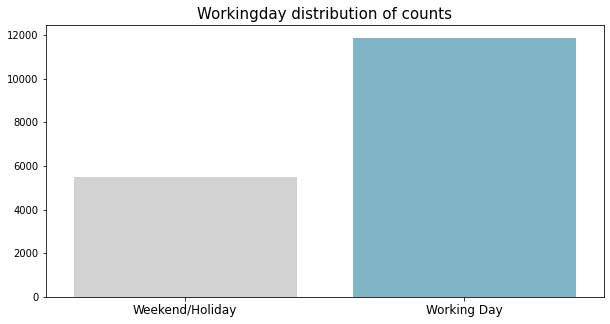

In [41]:
plt.figure(figsize=(10, 5))

colors = ["#D3D3D3", "#72BCD4"]

sns.barplot(
    y="total_count", 
    x="workingday",
    data=workingday_distribution.sort_values(by="total_count", ascending=False),
    palette=colors
)
plt.title("Workingday distribution of counts", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: 

#### Bagaimana pengaruh cuaca dan musim terhadap permintaan persewaan sepeda?

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker (' ').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


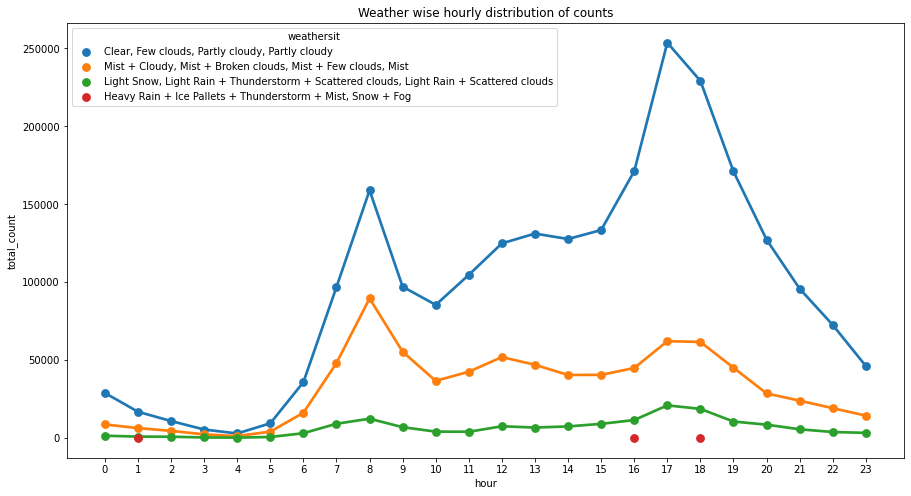

In [42]:
hourly_total_count = hour_df.groupby(['hour', 'weathersit'])['total_count'].sum().reset_index()

# Memisahkan data ke dalam dua bagian
hourly_total_count_zero = hourly_total_count[hourly_total_count['total_count'] == 0]
hourly_total_count_nonzero = hourly_total_count[hourly_total_count['total_count'] != 0]

# Membuat plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot data dengan total_count != 0
sns.pointplot(data=hourly_total_count_nonzero[['hour', 'total_count', 'weathersit']],
              x='hour',
              y='total_count',
              hue='weathersit',
              ax=ax)

# Plot data dengan total_count = 0
sns.scatterplot(data=hourly_total_count_zero[['hour', 'total_count', 'weathersit']],
                x='hour',
                y='total_count',
                hue='weathersit',
                ax=ax,
                marker=' ',  # Menghilangkan titik yang total_count = 0
                legend=False)  # Tidak perlu menampilkan legenda

ax.set(title="Weather wise hourly distribution of counts")
plt.show()

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

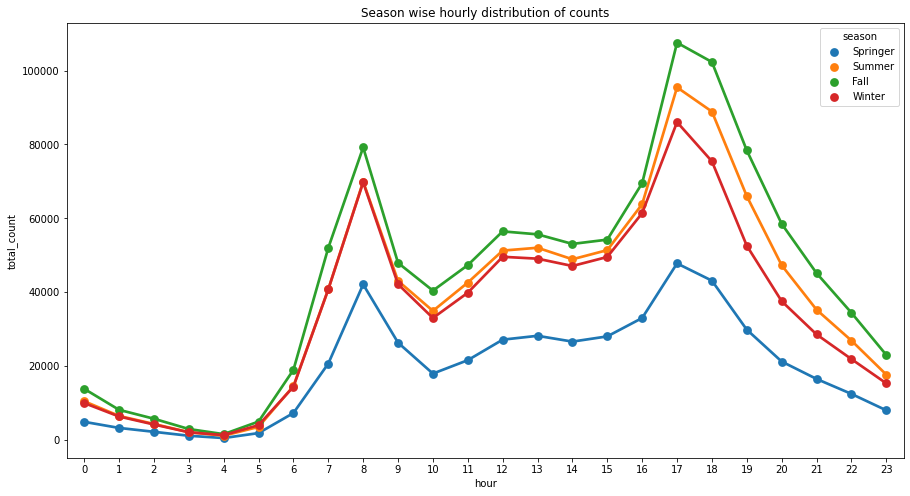

In [43]:
hourly_season_count = hour_df.groupby(['hour', 'season'])['total_count'].sum().reset_index()

fig,ax = plt.subplots(figsize=(15, 8))
sns.pointplot(data=hourly_season_count[['hour',
                           'total_count',
                           'season']],
              x='hour',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

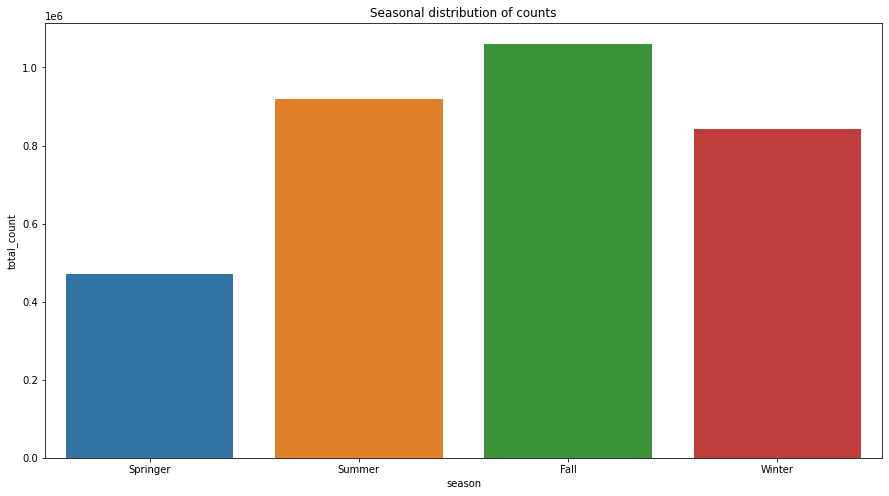

In [44]:
fig,ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=season_distribution[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)
ax.set(title="Seasonal distribution of counts")

### Pertanyaan 3: 

#### Bagaimana peningkatan persewaan sepeda setiap bulannya berdasarkan tahun?

[Text(0.5, 1.0, 'Year distribution of counts')]

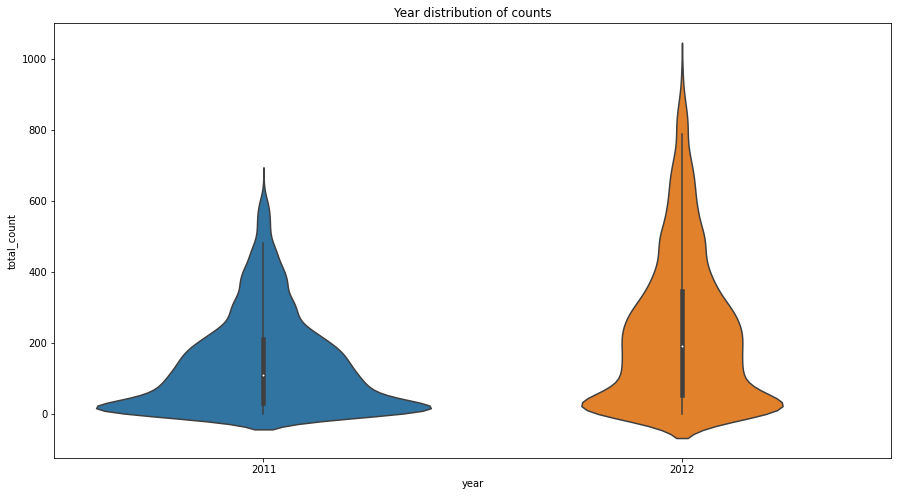

In [45]:
fig,ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=hour_df[['year',
                           'total_count']],
              x='year',
              y='total_count',
              ax=ax)
ax.set(title="Year distribution of counts")

[Text(0.5, 1.0, 'Month wise hourly distribution of counts')]

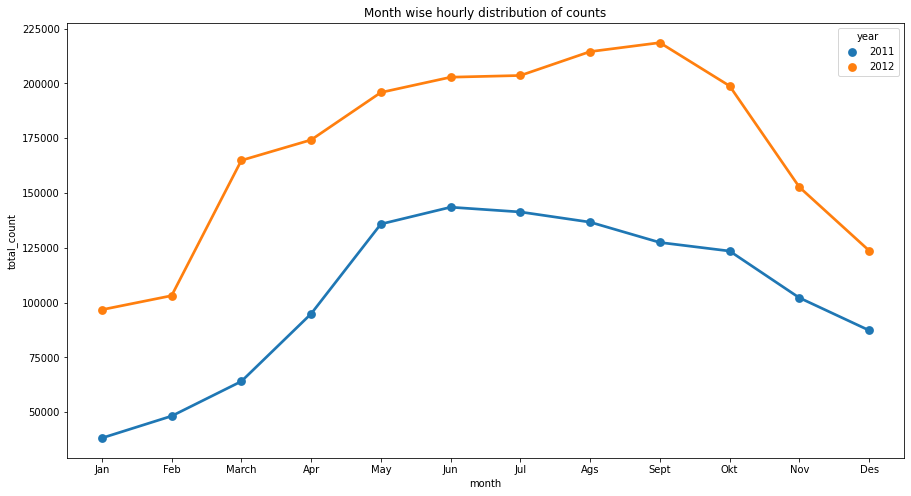

In [46]:
yearly_month_count = hour_df.groupby(['month', 'year'])['total_count'].sum().reset_index()

fig,ax = plt.subplots(figsize=(15, 8))
sns.pointplot(data=yearly_month_count[['month',
                           'total_count',
                           'year']],
              x='month',
              y='total_count',
              hue='year',
              ax=ax)
ax.set(title="Month wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

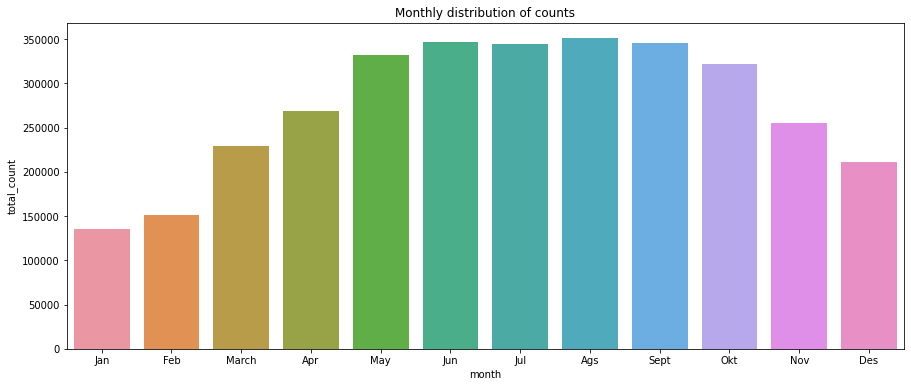

In [47]:
fig,ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=month_distribution[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)
ax.set(title="Monthly distribution of counts")

## Conclusion

### Pertanyaan 1: 
#### Seberapa sering permintaan persewaan sepeda saat hari kerja atau hari libur?

Peminat persewaan sepeda saat `working day` lebih banyak (dihitung berdasarkan jam) daripada saat `weekend/holiday`, maka dapat disimpulkan bahwa saat `working day` banyak penyewa sepeda setiap jam nya. 

### Pertanyaan 2:
#### Bagaimana pengaruh cuaca terhadap permintaan persewaan sepeda?

Dari hasil visualisasi yang dibuat, bahwasanya peminat persewaan sepeda yang paling banyak saat cuaca dengan keadaan `Clear, Few clouds, Partly cloudy, Partly cloudy`, sedangkan pada saat cuaca `Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog` hanya ada 2 penyewa sepeda saja, hal itu dikarenakan cuaca yang sangat buruk.

Selain itu, jika dilihat dari keadaaan musim, saat musim `Fall` peminat penyewa sepeda `paling banyak`, dan saat musim `Spreanger` peminat penyewa sepeda `paling sedikit`. 

### Pertanyaan 3:

#### Bagaimana peningkatan persewaan sepeda setiap bulannya berdasarkan tahun?

Saat `tahun 2012`, peminat penyewa sepeda `naik` dibandingkan tahun sebelumnya. Hal ini merupakan berita yang bagus karena meningkatnya penyewa sepeda dari tahun sebelumnya. Jika dilihat berdasarkan `bulan`, penyewa sepeda paling banyak terjadi pada top 3 bulan yaitu pada `bulan Agustus, Juni, dan September`

In [48]:
hour_df.to_csv("hours.csv", index=False)